# Workation Price Prediction Challenge
---------------------------------------



The new covid-era has provided a new way of living the work-life balance. We have seen a lot of different websites providing packages to work from different locations. From Kashmir to Kanyakumari, from Gujarat to Assam we have collected packages in and around India. It becomes really difficult to find the best place with all the amenities such as high-speed internet, a comfortable stay as well as within the budget. To solve the real-world problem of finding the best deals for a calm and enjoying workation trip. Workation is the best way to work at a remote location with a recreational and rejuvenating vacation for the team.

In this competition, one has to use the knowledge of machine learning, deep learning, and model building to predict the price per person for your next workstation trip. The data has more than 18000+ rows of different packages with the details like start location, hotel type, cost per person, destination, Itinerary, and many more.

**Dataset Description:**

- Train.csv - 21000 rows x 15 columns (Includes Per Person Price Column as Target variable)
- Test.csv - 9000 rows x 14 columns (Doesn't include the Target Variable)
- Sample Submission.csv

**Attributes:**

- **Uniq Id** - Unique Identifier per row sample
- **Package Name** - Name of the tour package
- **Package Type** - Type of the tour package
- **Destination** - A destination place
- **Itinerary** - complete itinerary
- **Places Covered** - covered places in the itinerary
- **Travel Date** - Date of travel
- **Hotel Details** - Details of the hotel stay
- **Start City** - Start place for the travel
- **Airline** - Flight details
- **Flight Stops** - Intermediate stops if any
- **Meals** - Inflight meals or services
- **Sightseeing Places Covered** - Itinerary details regarding sightseeing
- **Cancellation Rules** - Cancellation policy as per travel company
- **Per Person Price** - Price of the tour package per person (Target Column)


**Skills:**

- Advanced Regression Modeling
- Feature Engineering, Ensemble Modeling
- Optimizing RMSLE(Root Mean Squared Log Error) as a metric to generalize well on unseen data

# Data Preprocessing

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
data = pd.read_csv('Train.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21000 entries, 0 to 20999
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Uniq Id                     21000 non-null  object 
 1   Package Name                21000 non-null  object 
 2   Package Type                21000 non-null  object 
 3   Destination                 21000 non-null  object 
 4   Itinerary                   21000 non-null  object 
 5   Places Covered              21000 non-null  object 
 6   Travel Date                 21000 non-null  object 
 7   Hotel Details               21000 non-null  object 
 8   Start City                  21000 non-null  object 
 9   Airline                     21000 non-null  object 
 10  Flight Stops                21000 non-null  int64  
 11  Meals                       21000 non-null  int64  
 12  Sightseeing Places Covered  21000 non-null  object 
 13  Cancellation Rules          210

In [ ]:
print(data.isnull().sum())
# Check for duplicates in the training dataset
duplicate_rows_train = data[data.duplicated()]
print("\nDuplicate Rows in Training Data:")
print(duplicate_rows_train)

# Remove duplicates from the training dataset
data = data.drop_duplicates()
print("\nTraining Data After Removing Duplicates:")
print(data.info())

# Check for redundancies in the training dataset (e.g., columns with constant values)
redundant_columns_train = data.columns[data.nunique() == 1]
print("\nRedundant Columns in Training Data:")
print(redundant_columns_train)


Uniq Id                       0
Package Name                  0
Package Type                  0
Destination                   0
Itinerary                     0
Places Covered                0
Travel Date                   0
Hotel Details                 0
Start City                    0
Airline                       0
Flight Stops                  0
Meals                         0
Sightseeing Places Covered    0
Cancellation Rules            0
Per Person Price              0
dtype: int64

Duplicate Rows in Training Data:
Empty DataFrame
Columns: [Uniq Id, Package Name, Package Type, Destination, Itinerary, Places Covered, Travel Date, Hotel Details, Start City, Airline, Flight Stops, Meals, Sightseeing Places Covered, Cancellation Rules, Per Person Price]
Index: []

Training Data After Removing Duplicates:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 21000 entries, 0 to 20999
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------     

In [ ]:
data.head()

,Uniq Id,Package Name,Package Type,Destination,Itinerary,Places Covered,Travel Date,Hotel Details,Start City,Airline,Flight Stops,Meals,Sightseeing Places Covered,Cancellation Rules,Per Person Price
0,e788ab76d9d8cf1e6ed2f139645ca5d1,Best of Shimla and Manali Holiday from Delhi,Standard,New Delhi|Shimla|Manali|Chandigarh,1N New Delhi . 2N Shimla . 2N Manali . 1N Chan...,New Delhi|Shimla|Manali|Chandigarh,30-07-2021,Not Available,Mumbai,Not Available,2,3,Not Available,Not Available,11509.0
1,178f892630ce3e335a5a41d5d83937fd,Kashmir Valley vacation,Premium,Srinagar|Pahalgam|Srinagar,1N Srinagar . 2N Pahalgam . 1N Srinagar,Srinagar|Pahalgam|Srinagar,08-12-2021,The Orchard Retreat & Spa:4.6|WelcomHotel Pine...,New Delhi,IndiGo|IndiGo,0,5,Dal Lake | Avantipura Ruins | Mughal Gardens ...,Cancellation any time after making the 1st pay...,22485.5
2,f060f2954840503cc2fdaf495357b7df,Might of Mewar- Udaipur and Chittorgarh,Luxury,Udaipur|Chittorgarh,2N Udaipur . 1N Chittorgarh,Udaipur|Chittorgarh,26-04-2021,The Ananta:4.4|juSTa Lake Nahargarh Palace:4,New Delhi,IndiGo,0,4,Lake Pichola | Jag Mandir Palace | Saheliyon ...,Cancellation any time after making the 1st pay...,12421.5
3,32a19a6c171e67448f2346da46c619dc,Colorful Kerala ( Romantic Getaway ),Premium,Munnar|Kumarakom|Allepey|Kovalam and Poovar,2N Munnar . 1N Kumarakom . 1N Allepey . 2N Kov...,Munnar|Kumarakom|Allepey|Kovalam and Poovar,27-08-2021,Elixir Hills Suites Resort & Spa-MMT Holidays ...,New Delhi,IndiGo,0,5,Mattupetty Dam | Echo Point | Tata Tea Museum...,Cancellation any time after making the 1st pay...,35967.0
4,107b068aa0ca03bc6248966f594d105f,A Week In Bangkok & Pattaya,Premium,Pattaya|Bangkok,4N Pattaya . 3N Bangkok,Pattaya|Bangkok,12-12-2021,Dusit Thani Pattaya - MMT Special:4.5|Amari Wa...,New Delhi,Spicejet|Go Air,0,5,"Coral Island Tour with Indian Lunch, Join Spe...",Cancellation any time after making the 1st pay...,25584.0


In [ ]:
print("Unique values in each column for the training data:")
for column in data.columns:
    unique_values = data[column].unique()
    print(f"Column '{column}':")

    print(f"Number of unique values: {len(unique_values)}\n")

Unique values in each column for the training data:
Column 'Uniq Id':
Number of unique values: 21000

Column 'Package Name':
Number of unique values: 2204

Column 'Package Type':
Number of unique values: 5

Column 'Destination':
Number of unique values: 565

Column 'Itinerary':
Number of unique values: 966

Column 'Places Covered':
Number of unique values: 565

Column 'Travel Date':
Number of unique values: 495

Column 'Hotel Details':
Number of unique values: 6060

Column 'Start City':
Number of unique values: 2

Column 'Airline':
Number of unique values: 314

Column 'Flight Stops':
Number of unique values: 3

Column 'Meals':
Number of unique values: 4

Column 'Sightseeing Places Covered':
Number of unique values: 1714

Column 'Cancellation Rules':
Number of unique values: 10

Column 'Per Person Price':
Number of unique values: 17138



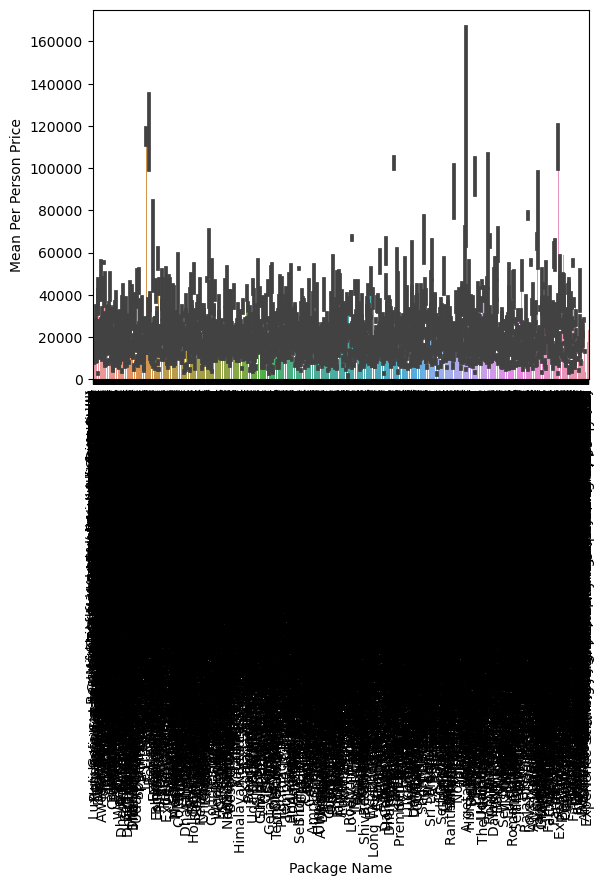

In [ ]:
import seaborn as sns
sns.barplot(x='Package Name', y='Per Person Price', data=data)
plt.xticks(rotation=90)
plt.ylabel('Mean Per Person Price')
plt.show()


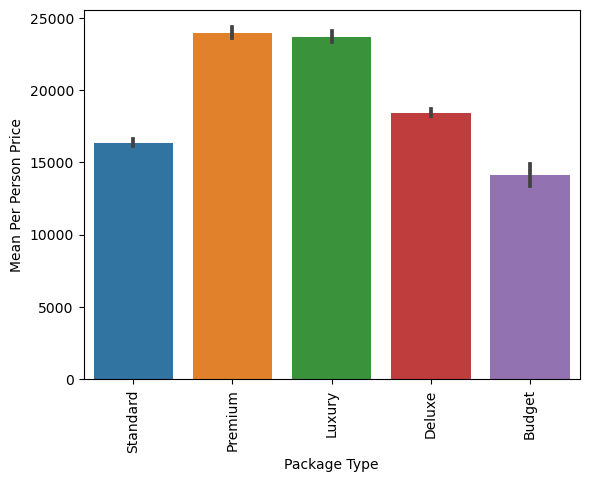

In [ ]:
import seaborn as sns
sns.barplot(x='Package Type', y='Per Person Price', data=data)
plt.xticks(rotation=90)
plt.ylabel('Mean Per Person Price')
plt.show()

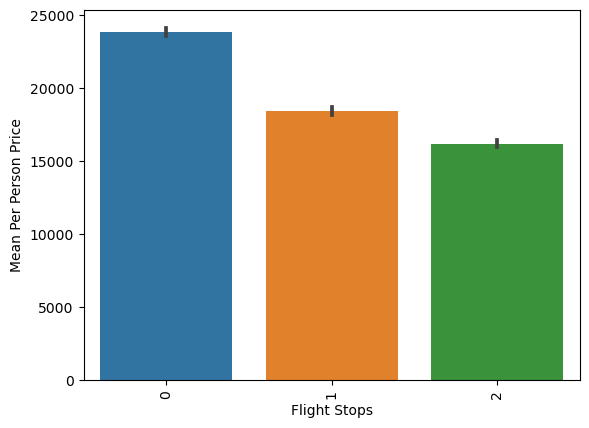

In [ ]:
import seaborn as sns
sns.barplot(x='Flight Stops', y='Per Person Price', data=data)
plt.xticks(rotation=90)
plt.ylabel('Mean Per Person Price')
plt.show()

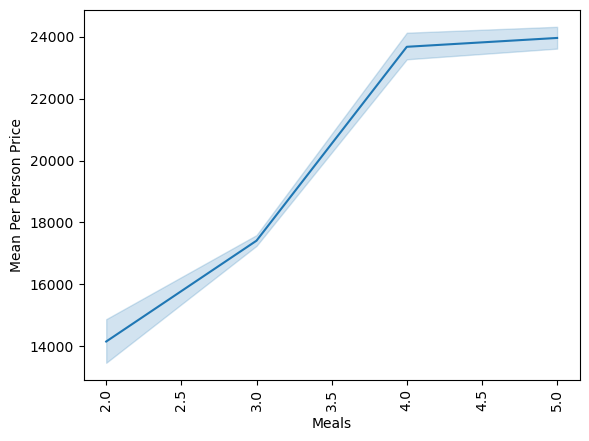

In [ ]:
import seaborn as sns
sns.lineplot(x='Meals', y='Per Person Price', data=data)
plt.xticks(rotation=90)
plt.ylabel('Mean Per Person Price')
plt.show()

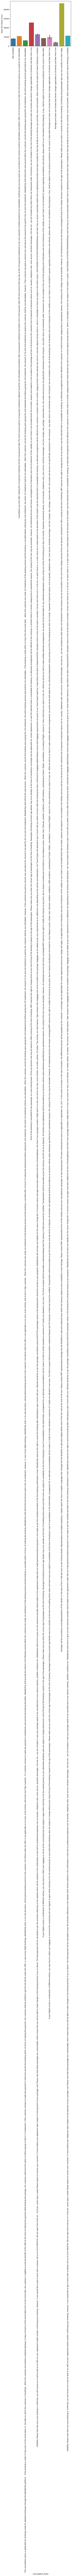

In [ ]:
import seaborn as sns
sns.barplot(x='Cancellation Rules', y='Per Person Price', data=data)
plt.xticks(rotation=90)
plt.ylabel('Mean Per Person Price')
plt.show()

In [ ]:
def split_category(value):
    vals = []
    if '|' in value:
        vals = value.split('|')
    else:
        vals.append(value)
    return vals

def show_category(series):
    values = {}
    for val in series:
        for each in val:
            if each in values:
                values[each] += 1
            else:
                values[each] = 1
    return values

In [ ]:
data['Airline'] = data['Airline'].apply(split_category)
data['Destination'] = data.Destination.apply(split_category)
data['Places Covered'] = data['Places Covered'].apply(split_category)
data['Sightseeing Places Covered'] = data['Sightseeing Places Covered'].apply(split_category)

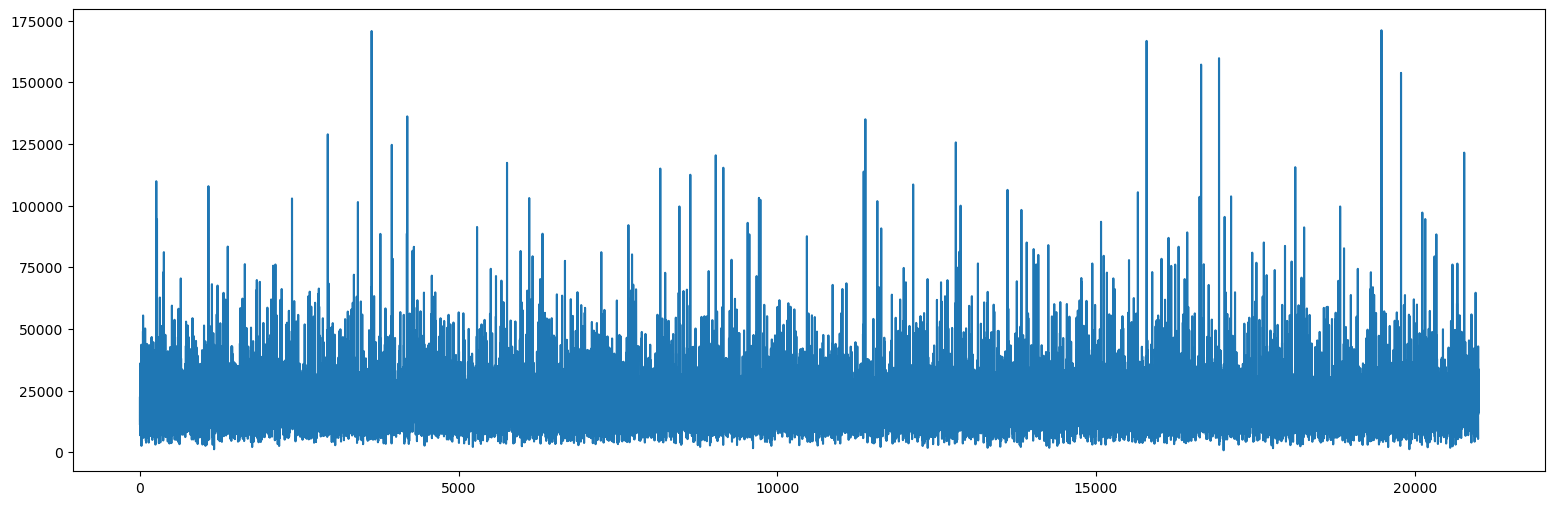

In [ ]:
plt.figure(figsize=(19, 6))
plt.plot(data['Per Person Price'])
plt.show()

In [ ]:
data.head()

,Uniq Id,Package Name,Package Type,Destination,Itinerary,Places Covered,Travel Date,Hotel Details,Start City,Airline,Flight Stops,Meals,Sightseeing Places Covered,Cancellation Rules,Per Person Price
0,e788ab76d9d8cf1e6ed2f139645ca5d1,Best of Shimla and Manali Holiday from Delhi,Standard,"[New Delhi, Shimla, Manali, Chandigarh]",1N New Delhi . 2N Shimla . 2N Manali . 1N Chan...,"[New Delhi, Shimla, Manali, Chandigarh]",30-07-2021,Not Available,Mumbai,[Not Available],2,3,[Not Available],Not Available,11509.0
1,178f892630ce3e335a5a41d5d83937fd,Kashmir Valley vacation,Premium,"[Srinagar, Pahalgam, Srinagar]",1N Srinagar . 2N Pahalgam . 1N Srinagar,"[Srinagar, Pahalgam, Srinagar]",08-12-2021,The Orchard Retreat & Spa:4.6|WelcomHotel Pine...,New Delhi,"[IndiGo, IndiGo]",0,5,"[ Dal Lake , Avantipura Ruins , Mughal Garde...",Cancellation any time after making the 1st pay...,22485.5
2,f060f2954840503cc2fdaf495357b7df,Might of Mewar- Udaipur and Chittorgarh,Luxury,"[Udaipur, Chittorgarh]",2N Udaipur . 1N Chittorgarh,"[Udaipur, Chittorgarh]",26-04-2021,The Ananta:4.4|juSTa Lake Nahargarh Palace:4,New Delhi,[IndiGo],0,4,"[ Lake Pichola , Jag Mandir Palace , Saheliy...",Cancellation any time after making the 1st pay...,12421.5
3,32a19a6c171e67448f2346da46c619dc,Colorful Kerala ( Romantic Getaway ),Premium,"[Munnar, Kumarakom, Allepey, Kovalam and Poovar]",2N Munnar . 1N Kumarakom . 1N Allepey . 2N Kov...,"[Munnar, Kumarakom, Allepey, Kovalam and Poovar]",27-08-2021,Elixir Hills Suites Resort & Spa-MMT Holidays ...,New Delhi,[IndiGo],0,5,"[ Mattupetty Dam , Echo Point , Tata Tea Mus...",Cancellation any time after making the 1st pay...,35967.0
4,107b068aa0ca03bc6248966f594d105f,A Week In Bangkok & Pattaya,Premium,"[Pattaya, Bangkok]",4N Pattaya . 3N Bangkok,"[Pattaya, Bangkok]",12-12-2021,Dusit Thani Pattaya - MMT Special:4.5|Amari Wa...,New Delhi,"[Spicejet, Go Air]",0,5,"[ Coral Island Tour with Indian Lunch, Join Sp...",Cancellation any time after making the 1st pay...,25584.0


## Feature Engineering

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [ ]:
features = ['Flight Stops', 'Meals', 'Cancellation Rules' ]
# One hot Encoding the "Package Type" column
dummy_type = pd.get_dummies(data['Package Type'], prefix='type')
#data.drop(columns=['Package Type'], inplace=True)

data = pd.concat([data, dummy_type], axis=1)




# One hot Encoding the "Start City" column
dummy_city = pd.get_dummies(data['Start City'], prefix='sc')
#data.drop(columns=['Start City'], inplace=True)

data = pd.concat([data, dummy_city], axis=1)

# Label Encoding of the "Cancellation Rules" Column
label_encoder2 = LabelEncoder().fit(data['Cancellation Rules'])
data['Cancellation Rules'] = label_encoder2.transform(data['Cancellation Rules'])

print(data.head(10))

                            Uniq Id  \
0  e788ab76d9d8cf1e6ed2f139645ca5d1   
1  178f892630ce3e335a5a41d5d83937fd   
2  f060f2954840503cc2fdaf495357b7df   
3  32a19a6c171e67448f2346da46c619dc   
4  107b068aa0ca03bc6248966f594d105f   
5  3bb074528941b3a6823371f77b07fb0f   
6  644c71b1a9ccfe6eacc6303be12c1352   
7  07943295cfdce5cb20861e8369948b1d   
8  126e12c63233bf11ef2e001a062f2a53   
9  72aeb7bac6d5600fe443fca06e3db631   

                                        Package Name Package Type  \
0       Best of Shimla and Manali Holiday from Delhi     Standard   
1                            Kashmir Valley vacation      Premium   
2            Might of Mewar- Udaipur and Chittorgarh       Luxury   
3               Colorful Kerala ( Romantic Getaway )      Premium   
4                        A Week In Bangkok & Pattaya      Premium   
5        Cochin Trip with Visit to Guruvayoor Temple       Deluxe   
6                                     Jaipur Holiday     Standard   
7                 

In [ ]:
def make_feature_col(series, all_keys):
    feature_dict = {}
    for key in all_keys:
        feature_dict[key] = []

    for items in series:
        for key in all_keys:
            if key not in items:
                feature_dict[key].append(0)
            else:
                feature_dict[key].append(1)

    return pd.DataFrame(feature_dict)

In [ ]:
#Modifying Itinerary column to store no.of days in the whole trip
import re

def sum_integers_from_string(text):
    # Using regular expression to find all integers in the string
    integers = re.findall(r'\d+', text)

    # Convert the extracted integers to integers and calculate their sum
    total_sum = int(sum(int(number) for number in integers))

    return total_sum

# Apply the function to the "Itinerary" column and replace the cells with the sums
data['Itinerary'] = data['Itinerary'].apply(sum_integers_from_string)
print(data['Itinerary'])

0        6
1        4
2        3
3        6
4        7
        ..
20995    6
20996    7
20997    5
20998    6
20999    6
Name: Itinerary, Length: 21000, dtype: int64


In [ ]:
# Structuring "Airline" Column
A_all_keys = show_category(data['Airline']).keys()
airline = make_feature_col(data['Airline'], A_all_keys)
data = pd.concat([data, airline], axis=1)

# Structuring "Destination" Column
D_all_keys = show_category(data['Destination']).keys()
destination = make_feature_col(data['Destination'], D_all_keys)
data = pd.concat([data, destination], axis=1)

# Structuring "Places Covered" Column
change = lambda pc: [each+'_pc' for each in pc]
PC_all_keys = show_category(data['Places Covered']).keys()
PC_all_keys = change(PC_all_keys)

p_covered = make_feature_col(data['Places Covered'], PC_all_keys)
data = pd.concat([data, p_covered], axis=1)
print(data.head())


# Convert "Travel Date" to datetime type with specified format
data['Travel Date'] = pd.to_datetime(data['Travel Date'], format='%d-%m-%Y')

# Extract month and day from "Travel Date" column
data['month'] = data['Travel Date'].dt.month


                            Uniq Id  \
0  e788ab76d9d8cf1e6ed2f139645ca5d1   
1  178f892630ce3e335a5a41d5d83937fd   
2  f060f2954840503cc2fdaf495357b7df   
3  32a19a6c171e67448f2346da46c619dc   
4  107b068aa0ca03bc6248966f594d105f   

                                   Package Name Package Type  \
0  Best of Shimla and Manali Holiday from Delhi     Standard   
1                       Kashmir Valley vacation      Premium   
2       Might of Mewar- Udaipur and Chittorgarh       Luxury   
3          Colorful Kerala ( Romantic Getaway )      Premium   
4                   A Week In Bangkok & Pattaya      Premium   

                                        Destination  Itinerary  \
0           [New Delhi, Shimla, Manali, Chandigarh]          6   
1                    [Srinagar, Pahalgam, Srinagar]          4   
2                            [Udaipur, Chittorgarh]          3   
3  [Munnar, Kumarakom, Allepey, Kovalam and Poovar]          6   
4                                [Pattaya, Bangkok

In [ ]:
features = ['Flight Stops', 'Meals', 'Cancellation Rules','Itinerary' ]
other_features = data.columns[15:].to_list()
#print(other_features)
features.extend(other_features)
target = ['Per Person Price']

X = data[features]
print(X.head())

print(X.columns)
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print('Shape of train set:', X_train.shape)
print('Shape of test set:', X_test.shape)

   Flight Stops  Meals  Cancellation Rules  Itinerary  type_Budget  \
0             2      3                   5          6            0   
1             0      5                   0          4            0   
2             0      4                   0          3            0   
3             0      5                   0          6            0   
4             0      5                   0          7            0   

   type_Deluxe  type_Luxury  type_Premium  type_Standard  sc_Mumbai  ...  \
0            0            0             0              1          1  ...   
1            0            0             1              0          0  ...   
2            0            1             0              0          0  ...   
3            0            0             1              0          0  ...   
4            0            0             1              0          0  ...   

   Joshimath_pc  Copenhagen_pc  Daman_pc  Helsinki_pc  Gwalior_pc  Orchha_pc  \
0             0              0         0  

## Model Building

In [ ]:
from sklearn.metrics import mean_squared_log_error
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, StackingRegressor, BaggingRegressor, GradientBoostingRegressor
from catboost import Pool, CatBoostRegressor
from sklearn.linear_model import LogisticRegression
from xgboost import XGBRegressor
from sklearn.preprocessing import MinMaxScaler

In [ ]:
regressor = XGBRegressor()
regressor.fit(X_train, y_train.values.ravel())
y_pred = regressor.predict(X_test)
print('RMSLE is {}'.format(np.sqrt(mean_squared_log_error(y_test, y_pred))))

RMSLE is 0.20889944531500207


In [ ]:
from sklearn.metrics import r2_score

# Assuming you have y_test (actual values) and y_pred (predicted values) from your model
r2 = r2_score(y_test, y_pred)

print(f"R-squared (R2) Score: {r2}")


R-squared (R2) Score: 0.783742499987392


In [ ]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print(mae)

3154.7571333240326


In [ ]:
from sklearn.metrics import mean_squared_error
squ = mean_squared_error(y_test, y_pred)
print(squ)

31840043.0612196


In [ ]:
1-(1-r2)*len(y_test-1)/(len(y_test)-X_test.shape[1]-1)
#adjusted r_squared 1-[(1-r2)*(n-1)/(n-k-1)]

0.7643031191475623

In [ ]:
# Import necessary packages
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest Regressor instance
regressor_r = RandomForestRegressor(n_estimators=100, random_state=42)  # You can adjust n_estimators and other hyperparameters

# Train the regressor on the training data
regressor_r.fit(X_train, y_train.values.ravel())

# Make predictions on the test data
y_pred = regressor_r.predict(X_test)

print('RMSLE is {}'.format(np.sqrt(mean_squared_log_error(y_test, y_pred))))


RMSLE is 0.21499955177455768


In [ ]:
# Import necessary packages
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor  # You can choose the base regressor

# Create a Bagging Regressor instance
base_regressor = DecisionTreeRegressor()  # You can choose a different base regressor
regressor_b = BaggingRegressor(base_regressor, n_estimators=100, random_state=42)  # You can adjust n_estimators and other hyperparameters

# Train the regressor on the training data
regressor_b.fit(X_train, y_train.values.ravel())

# Make predictions on the test data
y_pred = regressor_b.predict(X_test)

print('RMSLE is {}'.format(np.sqrt(mean_squared_log_error(y_test, y_pred))))



RMSLE is 0.21498426068012422


## Test Data Prediction

In [ ]:
test = pd.read_csv('Test.csv')
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Uniq Id                     9000 non-null   object
 1   Package Name                9000 non-null   object
 2   Package Type                9000 non-null   object
 3   Destination                 9000 non-null   object
 4   Itinerary                   9000 non-null   object
 5   Places Covered              9000 non-null   object
 6   Travel Date                 9000 non-null   object
 7   Hotel Details               9000 non-null   object
 8   Start City                  9000 non-null   object
 9   Airline                     9000 non-null   object
 10  Flight Stops                9000 non-null   int64 
 11  Meals                       9000 non-null   int64 
 12  Sightseeing Places Covered  9000 non-null   object
 13  Cancellation Rules          9000 non-null   obje

In [ ]:
test['Airline'] = test['Airline'].apply(split_category)
test['Destination'] = test.Destination.apply(split_category)
test['Places Covered'] = test['Places Covered'].apply(split_category)
test['Sightseeing Places Covered'] = test['Sightseeing Places Covered'].apply(split_category)

In [ ]:
test.head()

,Uniq Id,Package Name,Package Type,Destination,Itinerary,Places Covered,Travel Date,Hotel Details,Start City,Airline,Flight Stops,Meals,Sightseeing Places Covered,Cancellation Rules
0,12c47aefbcca65d6156ba0bc7946704b,Goa 5N stay with flights & Transfers-North Goa,Luxury,[Goa],5N Goa,[Goa],13-07-2021,Novotel Goa Resort & Spa:4.1,New Delhi,[IndiGo],0,4,[Not Available],Cancellation any time after making the 1st pay...
1,156febf7d27315ae9f210ed13bca3ac2,Into the Wild - Weekend at Bandipur National Park,Luxury,[Bandipur],2N Bandipur,[Bandipur],20-03-2021,The Windflower Jungle Resorts & Spa Bandipur:4.4,New Delhi,[Not Available],0,4,[ Bandipur National Park ],This cancellation policy is applicable for boo...
2,a7f43314e3ee6464a4e35b874bddf2ea,Unforgettable Munnar Getaway - Private Picnic ...,Standard,[Munnar],3N Munnar,[Munnar],09-02-2022,Not Available,New Delhi,[Not Available],2,3,"[ Old Munnar Town , Eravikulam national park ...",This cancellation policy is applicable for boo...
3,d9cc4b407f3d5d290560c03d9ac71035,Munnar for Adventure Lovers - Top Valley Trek,Deluxe,[Munnar],3N Munnar,[Munnar],16-05-2021,Not Available,Mumbai,[Not Available],1,3,"[ Tata Tea Museum , Eravikulam national park ...",This cancellation policy is applicable for boo...
4,b3bbc8aa6429feb260e9ac0a91f252c4,Splendours of Kerala - Make your own Tea,Luxury,"[Cochin, Munnar, Thekkady, Allepey]",1N Cochin . 2N Munnar . 1N Thekkady . 1N Allepey,"[Cochin, Munnar, Thekkady, Allepey]",13-10-2021,Casino Hotel - Cgh Earth-MMT Holidays Special:...,New Delhi,[IndiGo],0,4,"[ Fort Cochin , Dutch Palace , Jewish Synago...",Cancellation any time after making the 1st pay...


In [ ]:
# One hot Encoding the "Package Type" column
dummy_type = pd.get_dummies(test['Package Type'], prefix='type')
test.drop(columns=['Package Type'], inplace=True)
test = pd.concat([test, dummy_type], axis=1)

# One hot Encoding the "Start City" column
dummy_city = pd.get_dummies(test['Start City'], prefix='sc')
test.drop(columns=['Start City'], inplace=True)
test = pd.concat([test, dummy_city], axis=1)

# Label Encoding of the "Cancellation Rules" Column
test['Cancellation Rules'] = label_encoder2.transform(test['Cancellation Rules'])

# Structuring "Airline" Column
airline = make_feature_col(test['Airline'], A_all_keys)
test = pd.concat([test, airline], axis=1)

# Structuring "Destination" Column
destination = make_feature_col(test['Destination'], D_all_keys)
test = pd.concat([test, destination], axis=1)

# Structuring "Places Covered" Column
p_covered = make_feature_col(test['Places Covered'], PC_all_keys)
test = pd.concat([test, p_covered], axis=1)


# Convert "Travel Date" to datetime type with specified format
test['Travel Date'] = pd.to_datetime(test['Travel Date'], format='%d-%m-%Y')

# Extract month and day from "Travel Date" column
test['month'] = test['Travel Date'].dt.month
test['day'] = test['Travel Date'].dt.day

print(test.head(5))


                            Uniq Id  \
0  12c47aefbcca65d6156ba0bc7946704b   
1  156febf7d27315ae9f210ed13bca3ac2   
2  a7f43314e3ee6464a4e35b874bddf2ea   
3  d9cc4b407f3d5d290560c03d9ac71035   
4  b3bbc8aa6429feb260e9ac0a91f252c4   

                                        Package Name  \
0     Goa 5N stay with flights & Transfers-North Goa   
1  Into the Wild - Weekend at Bandipur National Park   
2  Unforgettable Munnar Getaway - Private Picnic ...   
3      Munnar for Adventure Lovers - Top Valley Trek   
4           Splendours of Kerala - Make your own Tea   

                           Destination  \
0                                [Goa]   
1                           [Bandipur]   
2                             [Munnar]   
3                             [Munnar]   
4  [Cochin, Munnar, Thekkady, Allepey]   

                                          Itinerary  \
0                                            5N Goa   
1                                       2N Bandipur   
2         

In [ ]:
prediction = regressor.predict(test[features])
submission = pd.DataFrame(prediction, columns=target)

ValueError: DataFrame.dtypes for data must be int, float, bool or category. When categorical type is supplied, The experimental DMatrix parameter`enable_categorical` must be set to `True`.  Invalid columns:Itinerary: object

In [ ]:
submission.to_csv('output.csv', index_label=False)

In [ ]:
submission.info